<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Topological_Momentum_Pump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

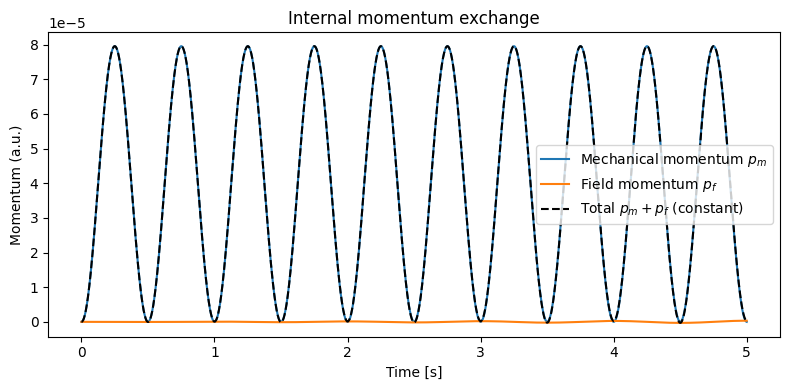

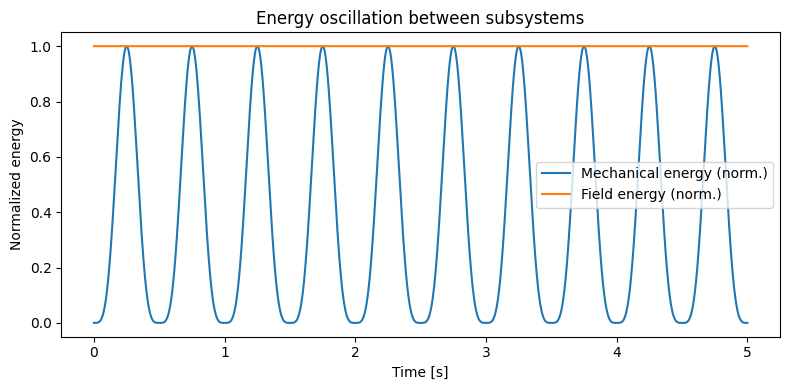

Mean total momentum ≈ 3.977e-05
Std(total momentum) ≈ 2.813e-05


In [ ]:
# ============================================================
#  Topological Momentum Pump  (rotating magnetic ring model)
#  Demonstration of internal momentum exchange between
#  mechanical and field subsystems.
#  Author: Mario J. Pinheiro (concept), simulation in Python
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ------------------ 1. PARAMETERS ----------------------------
kappa = 1.0e-3          # coupling strength  (sets scale of exchange)
I0, I1 = 1.0, 0.2       # base and modulated inertia terms
omega_drive = 2*np.pi    # drive frequency = 1 Hz
dt, T = 1e-3, 5.0        # time step and total time
steps = int(T/dt)
t = np.linspace(0, T, steps)

# ------------------ 2. FUNCTIONS ------------------------------
def I(l):      # variable moment of inertia
    return I0 + I1*np.cos(l)

def dIdl(l):
    return -I1*np.sin(l)

# Prescribed electromagnetic fields
E = np.sin(omega_drive*t)     # electric field (a.u.)
B = np.cos(omega_drive*t)     # magnetic field (a.u.)

# ------------------ 3. INTEGRATION LOOP -----------------------
lam = np.zeros(steps)
lam_dot = np.zeros(steps)

for i in range(steps-1):
    acc = (kappa*E[i]*B[i] - 0.5*dIdl(lam[i])*lam_dot[i]**2)/I(lam[i])
    lam_dot[i+1] = lam_dot[i] + dt*acc
    lam[i+1]     = lam[i] + dt*lam_dot[i]

# ------------------ 4. MOMENTA & ENERGY -----------------------
p_mech  = I(lam)*lam_dot
p_field = 2*kappa*lam*B
p_total = p_mech + p_field

# Kinetic and field energies
E_mech  = 0.5*I(lam)*lam_dot**2
E_field = 0.5*(E**2 + B**2)
E_total = E_mech + E_field

# ------------------ 5. PLOTS ---------------------------------
plt.figure(figsize=(8,4))
plt.plot(t, p_mech,  label='Mechanical momentum $p_m$')
plt.plot(t, p_field, label='Field momentum $p_f$')
plt.plot(t, p_total, '--k', label='Total $p_m+p_f$ (constant)')
plt.xlabel('Time [s]')
plt.ylabel('Momentum (a.u.)')
plt.legend()
plt.title('Internal momentum exchange')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(t, E_mech/E_mech.max(), label='Mechanical energy (norm.)')
plt.plot(t, E_field/E_field.max(), label='Field energy (norm.)')
plt.xlabel('Time [s]')
plt.ylabel('Normalized energy')
plt.title('Energy oscillation between subsystems')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Mean total momentum ≈ {np.mean(p_total):.3e}")
print(f"Std(total momentum) ≈ {np.std(p_total):.3e}")
